In [74]:
import numpy as np
import glob
import pandas as pd
import statsmodels.api as stat
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [78]:
nasdaq_close = pd.DataFrame()
tickers = []
for file_name in glob.glob('stock_market_data/nasdaq/csv/' + '*.csv'):
  ticker = (file_name.replace('stock_market_data/nasdaq/csv/', ''))[0:-4]
  ticker_data = pd.read_csv(file_name, usecols=['Date', 'Close'], low_memory=False)
  
  ticker_data['Close'] = np.log(ticker_data['Close'])
  ticker_data.rename(columns={'Close': ticker}, inplace=True)
  
  if nasdaq_close.empty:
    nasdaq_close = ticker_data
  else: 
    nasdaq_close = pd.merge(nasdaq_close, ticker_data, on='Date', how='outer')
    
  tickers.append(ticker)

In [ ]:
nasdaq_close['Date'] = pd.to_datetime(nasdaq_close['Date'])
nasdaq_close.set_index('Date', inplace=True)

In [ ]:
nasdaq_close.head()

,CSCO,BIOS,CSBK,SBGI,UFCS,AIRT,ISSC,KNDI,BCMXY,TRNS
Date,,,,,,,,,,
635126400000,-2.560618,NaN,NaN,NaN,1.548350,-0.875468,NaN,NaN,NaN,0.362905
635472000000,-2.527468,NaN,NaN,NaN,1.524445,-0.875468,NaN,NaN,NaN,0.318454
635558400000,-2.549445,NaN,NaN,NaN,1.524445,-0.875468,NaN,NaN,NaN,0.405465
635644800000,-2.538396,NaN,NaN,NaN,1.524445,-0.875468,NaN,NaN,NaN,0.405465
635731200000,-2.543905,NaN,NaN,NaN,1.524445,-0.875468,NaN,NaN,NaN,0.318454


<Axes: xlabel='Date'>

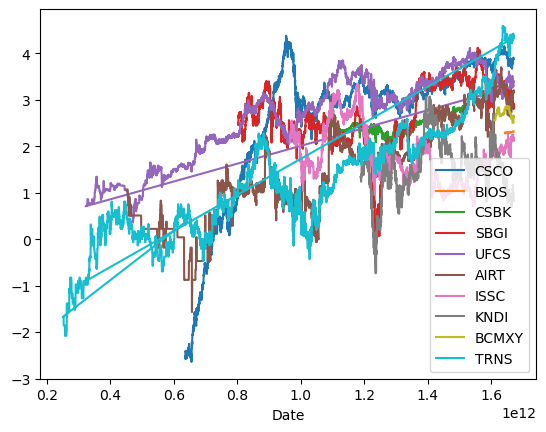

In [ ]:
nasdaq_close.plot()

In [ ]:
pair_results = []

for i in range(0, len(tickers)-1):
  for j in range(i+1, len(tickers)):
    pair = nasdaq_close[[tickers[i], tickers[j]]].dropna()
    if len(pair) == 0: continue
    test = adfuller(stat.OLS(pair[tickers[i]], pair[tickers[j]]).fit().resid)
    pair_results.append((tickers[i], tickers[j], test[1]))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
pair_results

[('CSCO', 'BIOS', 0.3506472494177263),
 ('CSCO', 'CSBK', 0.025983698095080787),
 ('CSCO', 'SBGI', 0.06769522629391936),
 ('CSCO', 'UFCS', 0.010737919291229116),
 ('CSCO', 'AIRT', 0.04815891652048588),
 ('CSCO', 'ISSC', 0.2925741938551818),
 ('CSCO', 'KNDI', 0.25985524035962704),
 ('CSCO', 'BCMXY', 0.268265778096801),
 ('CSCO', 'TRNS', 0.18444098870419556),
 ('BIOS', 'SBGI', 0.6805681531849282),
 ('BIOS', 'UFCS', 0.03266804325639454),
 ('BIOS', 'AIRT', 0.5286282772040521),
 ('BIOS', 'ISSC', 0.10693902551928136),
 ('BIOS', 'KNDI', 0.35506940886012645),
 ('BIOS', 'BCMXY', 0.790373037318034),
 ('BIOS', 'TRNS', 0.05666385465760854),
 ('CSBK', 'SBGI', 0.4491875674989632),
 ('CSBK', 'UFCS', 0.017365101689296183),
 ('CSBK', 'AIRT', 0.001964644517930112),
 ('CSBK', 'ISSC', 0.6703461033830401),
 ('CSBK', 'KNDI', 0.19371620480566498),
 ('CSBK', 'TRNS', 0.028622412318416543),
 ('SBGI', 'UFCS', 0.10893725084776701),
 ('SBGI', 'AIRT', 0.11562430417406527),
 ('SBGI', 'ISSC', 0.3879048349380753),
 ('S